In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [3]:
# ! unzip dataset.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
shops = pd.read_csv('/content/gdrive/MyDrive/dataset/shops.csv')
items = pd.read_csv('/content/gdrive/MyDrive/dataset/items.csv')
cats = pd.read_csv('/content/gdrive/MyDrive/dataset/item_categories.csv')

In [6]:
train = pd.read_csv('/content/gdrive/MyDrive/dataset/sales_train.csv')
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [7]:
test = pd.read_csv('/content/gdrive/MyDrive/dataset/test.csv')
test.tail()

,ID,shop_id,item_id
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
214199,214199,45,969


In [8]:
sales_by_item_id = train.pivot_table(index=['item_id'], values=['item_cnt_day'], 
                                     columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_item_id.columns = sales_by_item_id.columns.droplevel().map(str)
sales_by_item_id = sales_by_item_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_item_id.columns.values[0] = 'item_id'

In [9]:
sales_by_item_id.head()

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
sales_by_item_id.tail()

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
21802,22165,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21803,22166,0,0,0,0,0,0,0,0,0,...,7,8,12,4,8,10,8,11,5,11
21804,22167,0,0,0,0,0,0,0,0,56,...,33,46,40,38,31,33,34,29,21,37
21805,22168,2,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21806,22169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1. 銷售額分析

In [11]:
item_sales_monthly = train.pivot_table(columns='item_id',
                                          index='date_block_num', 
                                          values='item_cnt_day',
                                          fill_value=0,
                                          aggfunc=sum)
item_sales_monthly.head()

item_id,0,1,2,3,4,5,6,7,8,9,...,22160,22161,22162,22163,22164,22165,22166,22167,22168,22169
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,6,1,0,0,0,0,0,0,0,0


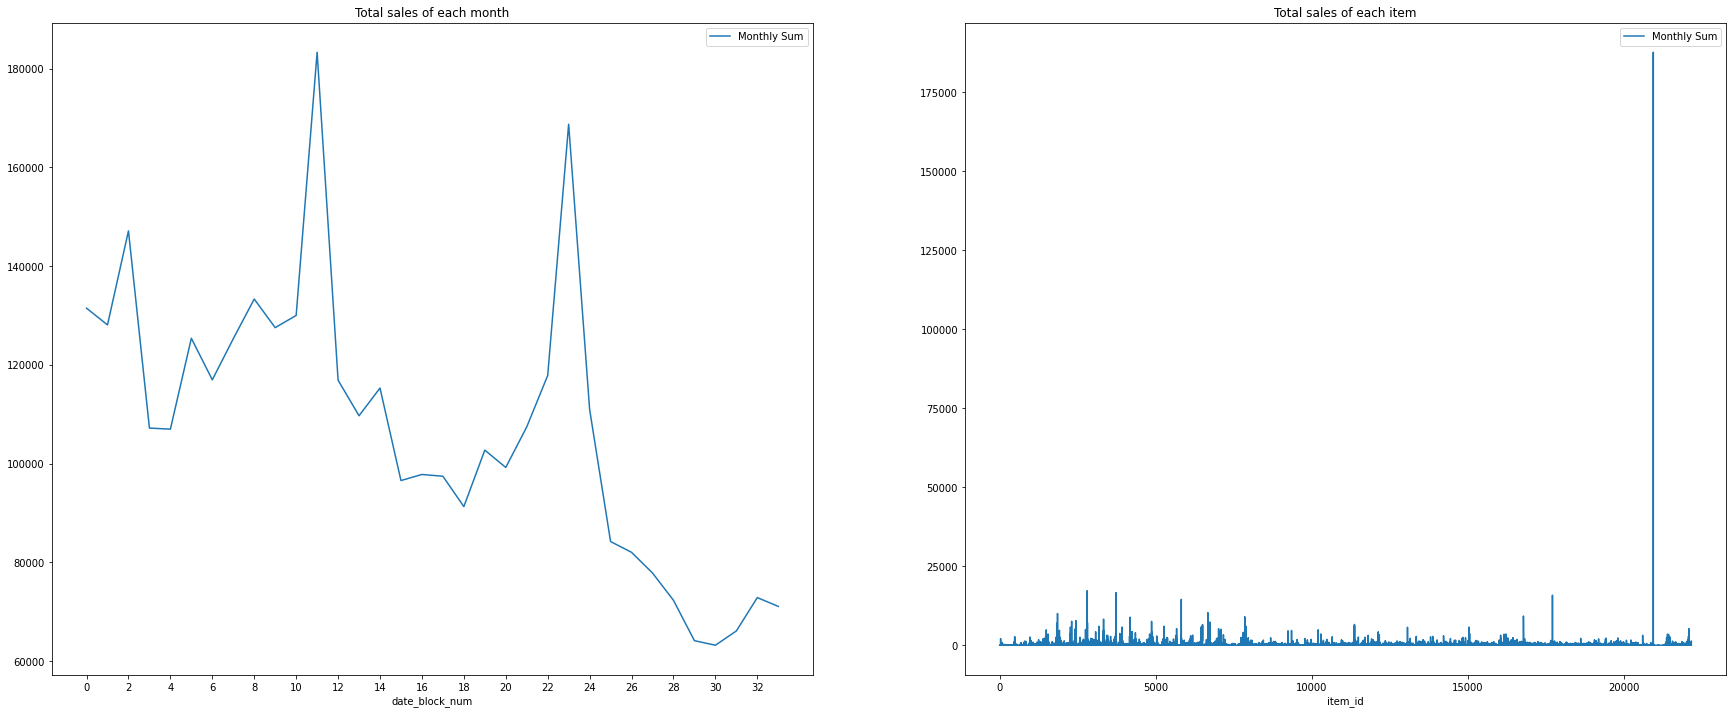

In [12]:
fig, axes = plt.subplots(1,2, figsize=(30, 12))

item_sales_monthly.sum(1).plot(ax=axes[0], title='Total sales of each month', xticks=[i for i in range(0,34,2)], legend=True, label='Monthly Sum')  # 每月總銷量
item_sales_monthly.sum(0).plot(ax=axes[1], title='Total sales of each item', legend=True, label='Monthly Sum')  # 每個商品的總銷量
plt.subplots_adjust(wspace=0.2)

In [13]:
top_sales = item_sales_monthly.sum().sort_values(ascending=False)
top_sales

item_id
20949    187642
2808      17245
3732      16642
17717     15830
5822      14515
          ...  
7547          0
13474        -1
18062        -1
11871        -1
1590        -11
Length: 21807, dtype: int64

# 2. 銷量最高的商品分析

In [14]:
top_sales.iloc[0] / item_sales_monthly.sum().sum() * 100  # 銷量占比

5.143404730982844

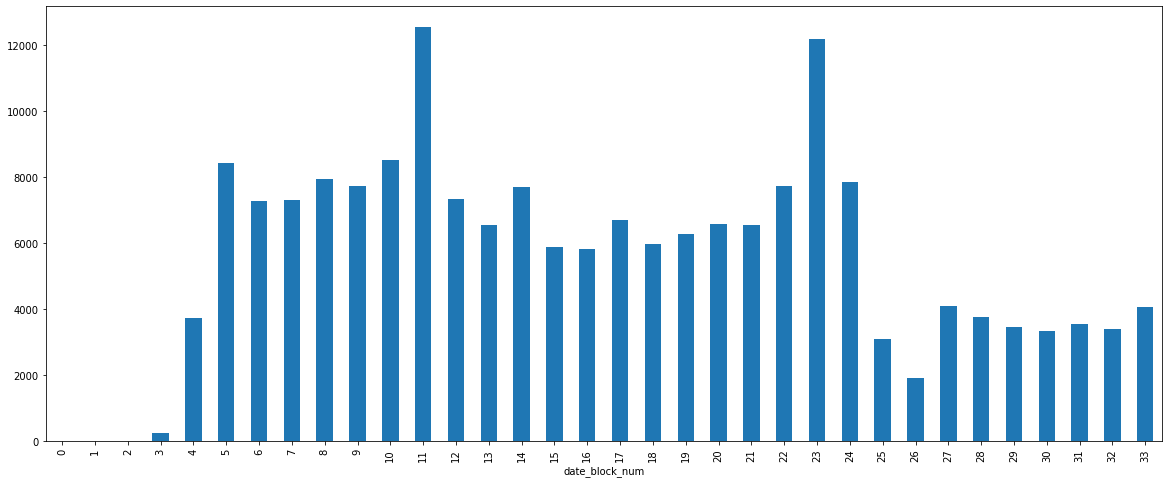

In [15]:
item_sales_monthly[top_sales.index[0]].plot(kind='bar', figsize=(20, 8))  # 每月銷量

In [16]:
train['turnover_day'] = train['item_price'] * train['item_cnt_day']
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,turnover_day
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


In [17]:
item_turnover_monthly = train.pivot_table(index= 'date_block_num',
                                               columns= 'item_id',
                                               values='turnover_day',
                                               fill_value=0,
                                               aggfunc=sum)
item_turnover_monthly.head()

item_id,0,1,2,3,4,5,6,7,8,9,...,22160,22161,22162,22163,22164,22165,22166,22167,22168,22169
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1477,0,0.0,0.0,0.0,0,0,0.0,1598.0,0
1,0,0,0,0,0,0,0,0,0,0,...,962,0,0.0,0.0,0.0,0,0,0.0,1598.0,0
2,0,0,0,0,0,0,0,0,0,0,...,894,0,0.0,0.0,0.0,0,0,0.0,798.5,0
3,0,0,0,0,0,0,0,0,0,0,...,298,0,0.0,0.0,0.0,0,0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,894,58,0.0,0.0,0.0,0,0,0.0,0.0,0


In [18]:
item_sales_monthly = item_sales_monthly.drop(columns=top_sales[top_sales<=0].index, axis=1)  # 去掉銷量為0和負值的商品
item_turnover_monthly = item_turnover_monthly.drop(columns=top_sales[top_sales<=0].index, axis=1)

In [19]:
total_turnover = item_turnover_monthly.sum().sum()
item_turnover_monthly[top_sales.index[0]].sum() / total_turnover * 100

0.027327687494408143

In [20]:
items[items['item_id']==20949]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


# 3. 分析總體銷量呈現下降趨勢的可能原因

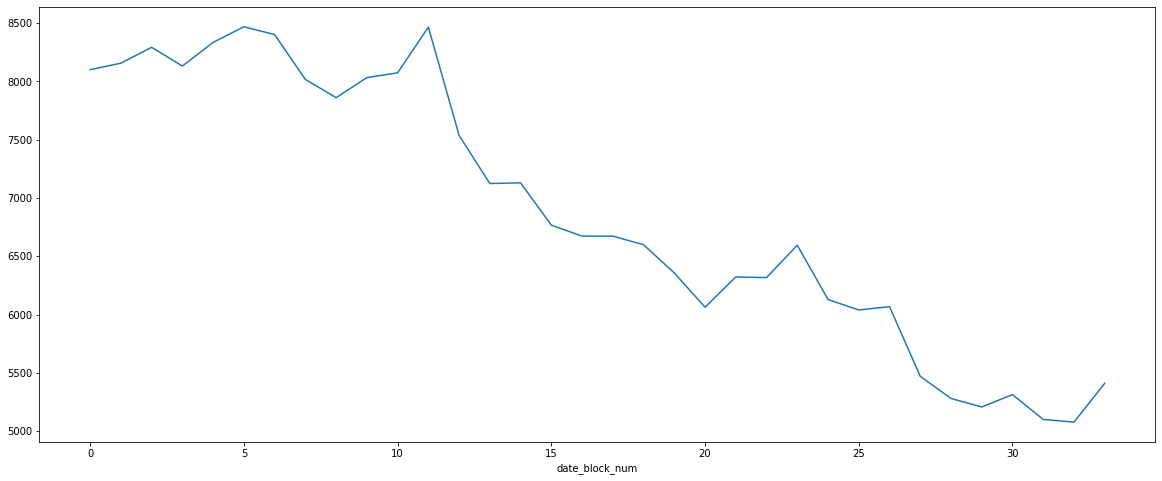

In [21]:
(item_sales_monthly > 0).sum(1).plot(figsize=(20, 8))

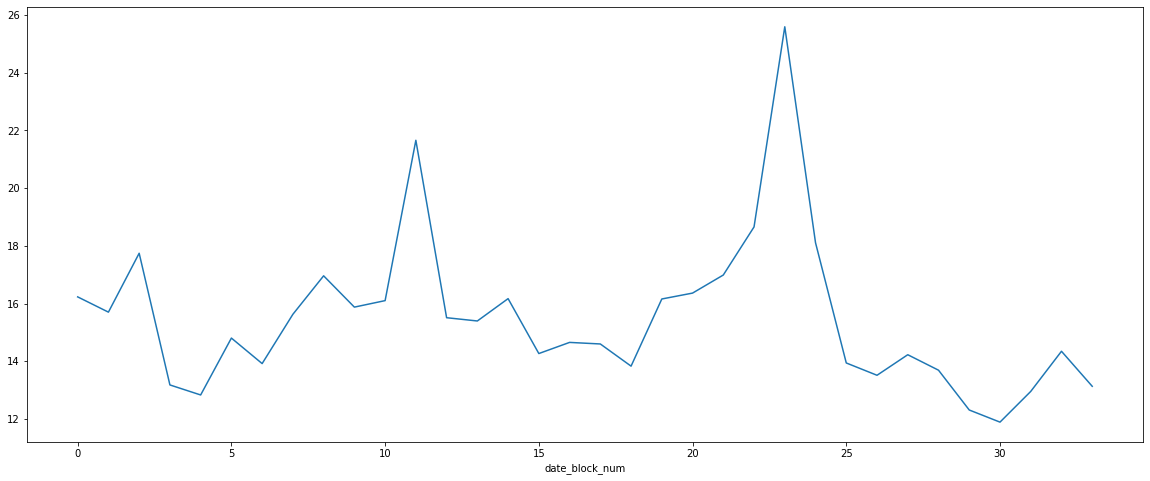

In [22]:
item_sales_monthly.sum(1).div((item_sales_monthly > 0).sum(1)).plot(figsize=(20, 8))
# 商品月總銷量 / 當月在售商品數量 = 當月在售商品平均銷量

# 4. 營收分析

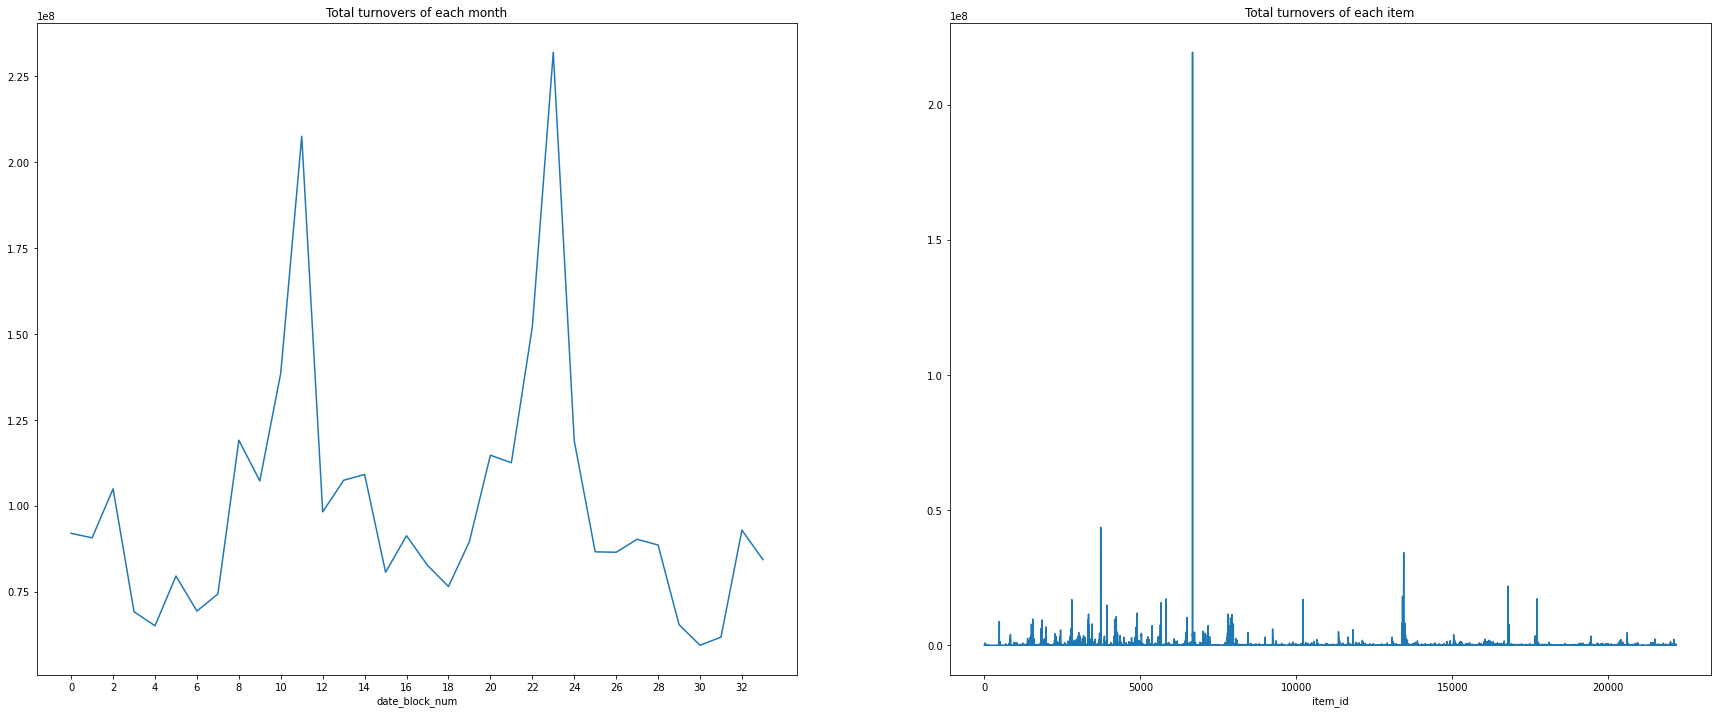

In [23]:
fig, axes = plt.subplots(1,2, figsize=(30, 12))
item_turnover_monthly.sum(1).plot(ax=axes[0], title='Total turnovers of each month', xticks=[i for i in range(0,34,2)])  # 每月總營收
item_turnover_monthly.sum(0).plot(ax=axes[1], title='Total turnovers of each item')  # 每個商品的總營收
plt.subplots_adjust(wspace=0.2)

# 5. 總營收最高的商品

In [24]:
top_turnover = item_turnover_monthly.sum().sort_values(ascending=False)
top_turnover

item_id
6675     2.193915e+08
3732     4.361798e+07
13443    3.433125e+07
3734     3.106516e+07
3733     2.229886e+07
             ...     
18098    2.100000e+01
3856     1.700000e+01
7756     1.500000e+01
22010    1.400000e+01
22098    7.000000e+00
Length: 21799, dtype: float64

In [25]:
item_turnover_monthly[top_turnover.index[0]].sum() / total_turnover * 100

6.4546198200432485

In [26]:
item_sales_monthly[top_turnover.index[0]].sum() / item_sales_monthly.sum().sum() * 100

0.2820279478759504

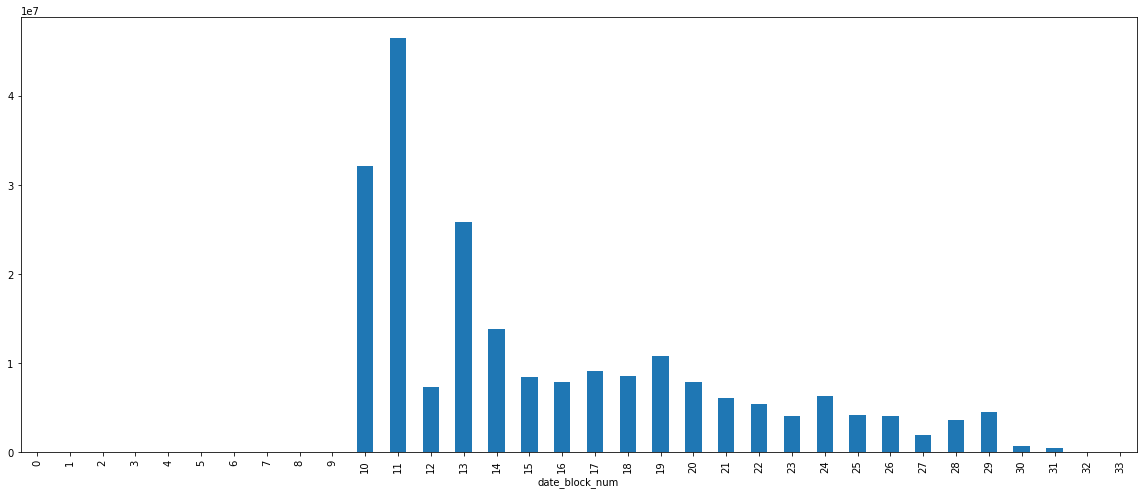

In [27]:
item_turnover_monthly[top_turnover.index[0]].plot(kind='bar', figsize=(20, 8))

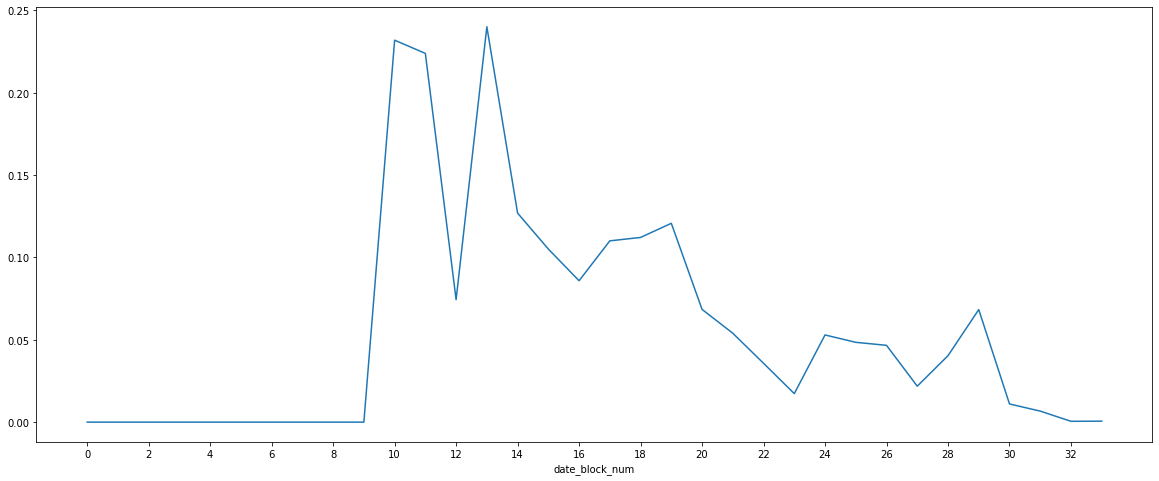

In [28]:
item_turnover_monthly[top_turnover.index[0]].div(item_turnover_monthly.sum(1)).plot(figsize=(20, 8),xticks=[i for i in range(0,34,2)])

In [29]:
items[items['item_id']==top_turnover.index[0]]

,item_name,item_id,item_category_id
6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,6675,12


# 6. 離群值分析

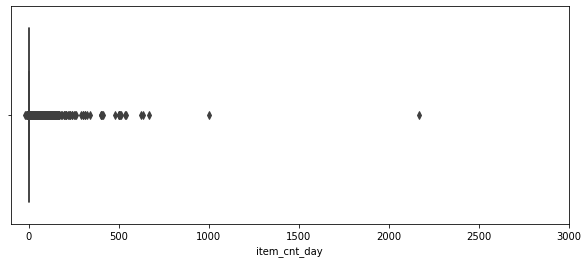

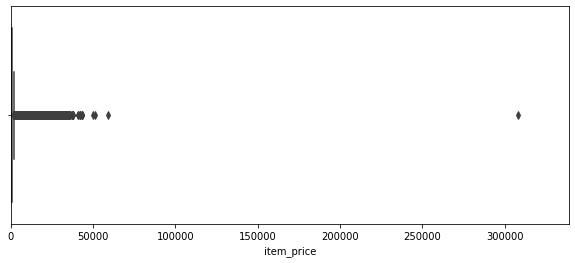

In [30]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)